# Loan Dataset Exploration
## by Neha Patil

## Preliminary Wrangling

> This document explores a dataset containing 113937 listed loans with 81 features.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the dataset prosperLoanData.csv
loan=pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# List out all the features of the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# List loan statistics
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


> There are two features 1. CreditGrade and 2. ProsperRating (Alpha). CreditGrade contains data pre 2009 and ProsperRating (Alpha) contains data post 2009. I will combine these two columns to get one standard feature.

In [5]:
# Get the index where ProsperRating (Alpha) is NaN
index_list=loan[loan['ProsperRating (Alpha)'].isnull()].index
index_list

Int64Index([     0,      2,     11,     17,     21,     39,     42,     46,
                59,     62,
            ...
            113904, 113906, 113914, 113915, 113918, 113921, 113922, 113923,
            113926, 113927],
           dtype='int64', length=29084)

In [6]:
# Fill those index with values from CreditGrade column
for index in index_list:
    if loan.loc[index,'CreditGrade']:
        loan.loc[index,'ProsperRating (Alpha)']=loan.loc[index,'CreditGrade']

In [7]:
#Check the count of each variable
loan['ProsperRating (Alpha)'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: ProsperRating (Alpha), dtype: int64

In [8]:
# Make the ProsperRating (Alpha) column into a ordered categorical data type
order=['HR','E','D','C','B','A','AA']
ProsperRating_order=pd.api.types.CategoricalDtype(ordered=True,categories=order)
loan['ProsperRating (Alpha)']=loan['ProsperRating (Alpha)'].astype(ProsperRating_order)

In [9]:
# Calculate Annual Income from StatedMonthlyIncome
loan['AnnualIncome']=np.ceil(loan['StatedMonthlyIncome']*12)
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,AnnualIncome
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,37000.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,73500.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,25000.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,34500.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,115000.0


In [10]:
loan[loan['AnnualIncome']<100]['AnnualIncome'].count()

1700

> There are many Annual Income listed less than 100 dollars. If the borrowers are students or homemakers then their income is 0. The rest of the income stated less than 100 dollars cane be either a data entry mistake or it is the actual income of the borrower at the time of listing.

In [11]:
loan['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


> There are many job types in the Occupation feature. To make graphs easier to plot we will group these jobs under a common category.

In [12]:
# Divide jobs into different category
white=['Professional','Executive','Computer Programmer','Clerical','Teacher','Accountant/CPA','Attorney','Nurse (RN)',
      'Analyst',"Nurse's Aide",'Investor','Nurse (LPN)','Administrative Assistant','Social Worker','Professor',
      'Civil Service','Pharmacist','Scientist', 'Dentist','Architect','Doctor', 'Chemist','Principal',
      "Teacher's Aide",'Pilot - Private/Commercial','Psychologist', 'Biologist','Judge','Clergy','Religious',
      'Engineer - Mechanical','Engineer - Electrical','Engineer - Chemical']
blue=['Skilled Labor','Construction','Laborer','Truck Driver','Medical Technician','Postal Service',
      'Tradesman - Mechanic','Tradesman - Electrician',     'Tradesman - Carpenter','Tradesman - Plumber',
      'Landscaping','Bus Driver',
     'Fireman','Military Enlisted','Military Officer','Police Officer/Correction Officer']
pink=['Sales - Retail','Waiter/Waitress','Food Service','Sales - Commission','Retail Management','Realtor',
      'Flight Attendant','Food Service Management','Car Dealer']
student=['Student - College Senior','Student - College Graduate Student', 'Student - Technical School',
        'Student - College Sophomore','Student - College Junior','Student - Community College',
         'Student - College Freshman']

In [13]:
# Replace the jobs with category name
loan['Occupation'].replace(white,'White Collar',inplace=True)
loan['Occupation'].replace(blue,'Blue Collar',inplace=True)
loan['Occupation'].replace(pink,'Pink Collar',inplace=True)
loan['Occupation'].replace(student,'Student',inplace=True)

In [14]:
loan['Occupation'].value_counts()

White Collar    53054
Other           28617
Blue Collar     15370
Pink Collar     12489
Student           699
Homemaker         120
Name: Occupation, dtype: int64

>TotalProsperLoans has NaN if a borrower had no previous loans. Lets replace this with 0.

In [15]:
# Replace NaN with 0 in TotalProsperLoans
loan['TotalProsperLoans'].fillna(0,inplace=True)

In [16]:
loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [17]:
# Make LoanStatus into a ordered categorical datatype
order=['Defaulted','Cancelled', 'Chargedoff','Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)'
       ,'Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)','FinalPaymentInProgress',
      'Current','Completed']
loan_order=pd.api.types.CategoricalDtype(ordered=True,categories=order)
loan['LoanStatus']=loan['LoanStatus'].astype(loan_order)

In [18]:
#Rename columns to remove names in paranthesis
loan.rename(columns={'ProsperRating (Alpha)':'ProsperRating','ListingCategory (numeric)':'ListingCategory',
                     'Occupation':'OccupationCategory'},inplace=True)

In [19]:
# Drop records with no ProsperRating
no_prsper_rating=loan[loan['ProsperRating'].isnull()].index
loan=loan.drop(no_prsper_rating)

In [20]:
loan[loan['ProsperRating'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,AnnualIncome


### What is the structure of your dataset?

> There are 113937 loan entries in the dataset with 81 variables. Most of the variables are numeric in nature with some of them categorical features. Some of the features are:
>1. LoanStatus- The phase of the loan.

>'Defaulted' -Failure to repay the loan or the interest rate even after the deliquency period. This generally applies to mortgage or national debts.

>'Cancelled'- When a debtor is no longer able to pay the loan or has filed for bankcruptcy, they can ask the creditor to cancel the loan.

>'Chargedoff'- When a debtor has crossed a set period of deliquency the creditor can charge off the loan but the debt is still valid. This means that loan will not be collected via a traditional method instead it si collected by methods like property seizure and lawsuits.

>'Past Due (>120 days)','Past Due (91-120 days)','Past Due (61-90 days)','Past Due (31-60 days)','Past Due (16-30 days)','Past Due (1-15 days)'- These are the various deliquency periods of the loan. To keep matters simple I will be referring these as deliquent loans.

>'FinalPaymentInProgress'-Loan is almost paid off.

>'Current'-Loan is ongoing.

>'Completed'>Loan has been paid off.

>2. ProsperRating- Credit Grade of the debtor.

>'HR','E','D','C','B','A','AA': Lowest rating HR and highest rating-AA.

>3. Term-12,36,60

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in features that are best in determing LoanStatus and BorrowerAPR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the features that will help me most in my investigation are ProsperRating, ProsperScore, LoanAmount, AnnualIncome and Term.

## Univariate Exploration

> In this section I will plot features of interest to visualise the trends in the features.
> To plot qualatative data I will be using seaborn's coutnplot function
> To plot quantatative data I will be using matplotlib's hist function.

In [21]:
# Set base color
base_color=sb.color_palette()[0]

In [22]:
loan['LoanStatus'].value_counts()

Current                   56576
Completed                 37910
Chargedoff                11951
Defaulted                  4951
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

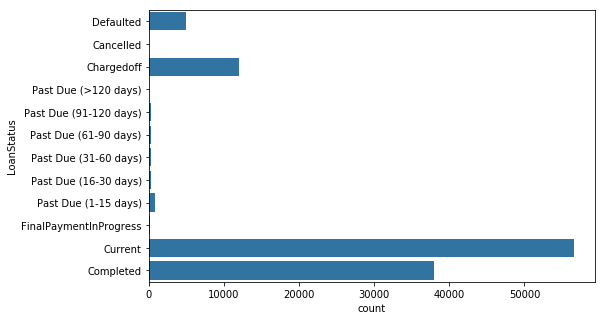

In [23]:
# Univariate plot of LoanStatus 
plt.figure(figsize=(8,5))
sb.countplot(data=loan,y='LoanStatus',color=base_color);

>**Observation**
The largest number of loans listed in this dataset are still ongoing (Current). The loan status Completed has the second largest number of count followed by Chargedoff and Defaulted. The delinquency categories of past due are significantly small in number. Two of them -FinalPaymentInProgress and Cancelled are so small in count that they did not get plotted on the graph.

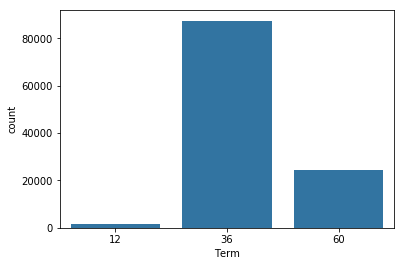

In [24]:
# Univariate plot of Term
sb.countplot(data=loan,x='Term',color=base_color);

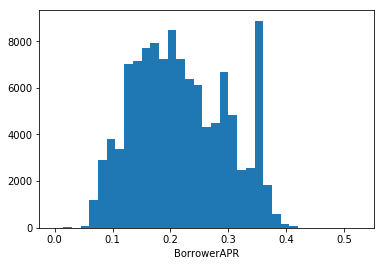

In [25]:
# Univariate plot of BorrowerAPR
bins=np.arange(0,loan['BorrowerAPR'].dropna().max()+0.015,0.015)
plt.hist(x=loan['BorrowerAPR'].dropna(),bins=bins);
plt.xlabel('BorrowerAPR');

>**Observation**
The univariate plot of Borrower APR is bimodal in nature with two peaks at 0.2 and 0.36 (approx) respectively. The bulk of the data lies between 0.1 and 0.3 with the count gradually decreasing from 0.25.

>This means that the most common Borrower APR is in the range 0.1 o 0.3.

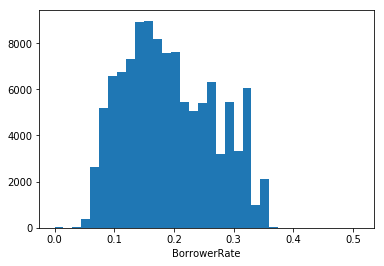

In [26]:
# Univariate plot of BorrowerRate
bins=np.arange(0,loan['BorrowerRate'].dropna().max()+0.015,0.015)
plt.hist(x=loan['BorrowerRate'].dropna(),bins=bins);
plt.xlabel('BorrowerRate');

>**Observation**
The univariate plot of Borrower Rate is unimodal in nature with its peak at 0.15 (approx). The bulk of the data lies between 0.1 and 0.3 with the count gradually decreasing from 0.25.

>This means that the most common Borrower Rate is in the range 0.1 o 0.3.

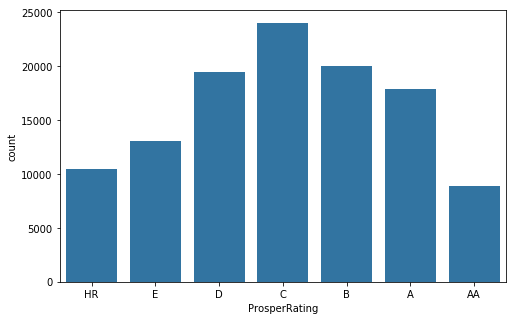

In [27]:
# Univariate plot of ProsperRating
plt.figure(figsize=(8,5))
sb.countplot(data=loan,x='ProsperRating',color=base_color);

>**Observation**
Most of the borrowers have an average credit score ('C'). Most of the borrowers have good credit score with the least numbers being in the extreme end of High Risk(HR) and AA.

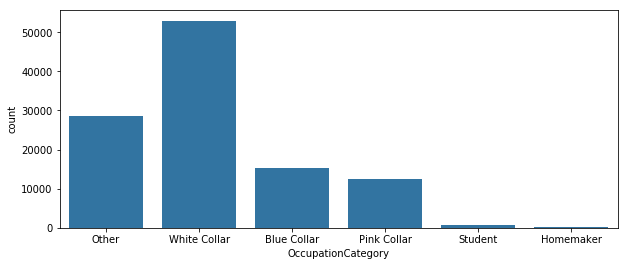

In [28]:
# Univariate plot of OccupationCategory
plt.figure(figsize=(10,4))
sb.countplot(data=loan,x='OccupationCategory',color=base_color);

>**Observation**
Most of the borrowers belong to the white collar job category. This category includes proefssion like teachers, doctors, professionals etc. The blue collar category has professions such as labor and law enforcement. The least number of borrowers are from students(college) and homemakers.

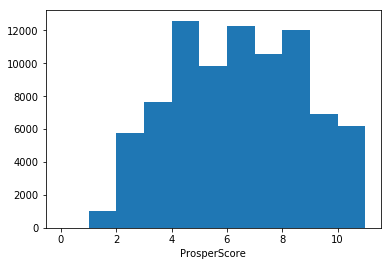

In [29]:
# Univariate plot of ProsperScore
bins=np.arange(0,loan['ProsperScore'].dropna().max()+1,1)
plt.hist(x=loan['ProsperScore'].dropna(),bins=bins);
plt.xlabel('ProsperScore');

>**Observation**
Prosper score is similar to prosper rating. 0- being worst and 10 being the best. The plot is bimodal in nature with its peak at 4 and 7 respectively. The bulk of the data lies between 4 and 9.

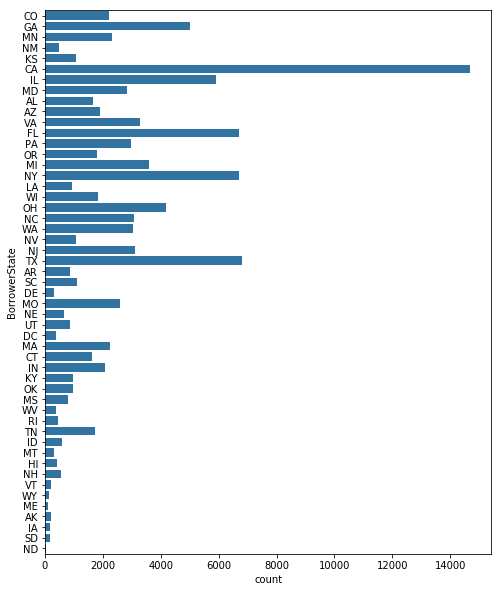

In [30]:
# Univariate plot of BorrowerState
plt.figure(figsize=(8,10))
sb.countplot(data=loan,y='BorrowerState',color=base_color);

>**Observation**
Most of the borrowers are from the state of California.

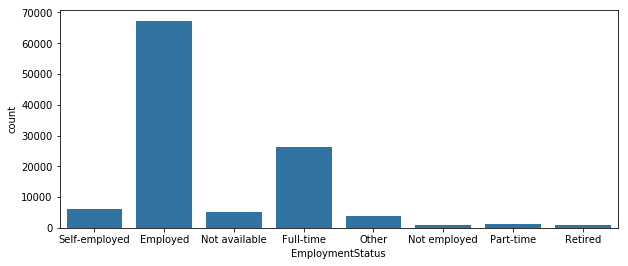

In [31]:
# Univariate plot of EmploymentStatus
plt.figure(figsize=(10,4))
sb.countplot(data=loan,x='EmploymentStatus',color=base_color);

>**Observation**
Majority of the borrowers are employed in some way or the other.

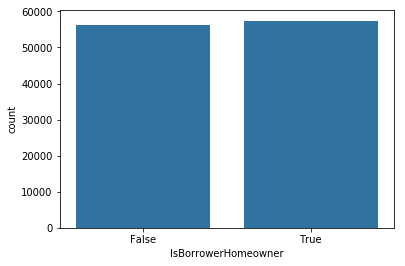

In [32]:
# Univariate plot of IsBorrowerHomeowner
sb.countplot(data=loan,x='IsBorrowerHomeowner',color=base_color);

>**Observation**
There is no significant difference between the number of house owners and non house owners

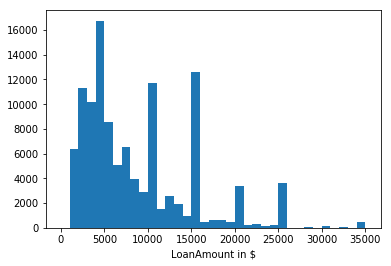

In [33]:
# Univariate plot of LoanOriginalAmount
bins=np.arange(0,loan['LoanOriginalAmount'].max()+1000,1000)
plt.hist(x=loan['LoanOriginalAmount'],bins=bins);
plt.xlabel('LoanAmount in $');

>**Observation**
Loan amount tends to be whole values such as 5000,10000 etc. The data peaks at 5000 which mean that loan amount of 5000 dollars is most common. Since this data is highly skewed, let's perform log tranform to get a nomarl curve.

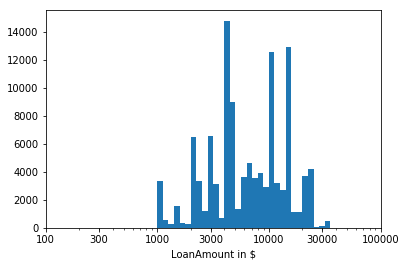

In [34]:
# Univariate plot of LoanOriginalAmount using log transform
bins=10**np.arange(0,np.log(loan['LoanOriginalAmount'].max())+0.05,0.05)
plt.hist(x=loan['LoanOriginalAmount'],bins=bins);
plt.xscale('log')
plt.xlim(100,100000)
xticks=[100,300,1000,3000,10000,30000,100000]
plt.xticks(xticks,xticks);
plt.xlabel('LoanAmount in $');

>**Observation**
After performing a log transform on the x-axis we get a normal curve plot. It is a bimodal plot with its highest peak at 5000.

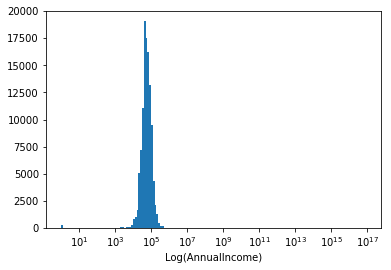

In [35]:
# Univariate plot of AnnualIncome using log transform
bins=10**np.arange(0,np.log(loan['AnnualIncome'].max())+0.1,0.1)
plt.hist(x=loan['AnnualIncome'],bins=bins);
plt.xscale('log')
plt.xlabel('Log(AnnualIncome)');

>**Observation**
There are some income values which are 0. Due to these outliers we cannot get a clear picture of the plot of annual income.
Lets apply axis limits to zoom into the plot.

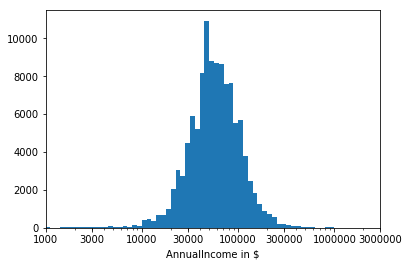

In [36]:
# Univariate plot of AnnualIncome using log transform and axis limits
bins=10**np.arange(0,np.log(loan['AnnualIncome'].max())+0.05,0.05)
plt.hist(x=loan['AnnualIncome'],bins=bins);
plt.xscale('log')
plt.xlim(1000,3000000)
xticks=[1000,3000,10000,30000,100000,300000,1000000,3000000]
plt.xticks(xticks,xticks);
plt.xlabel('AnnualIncome in $');

>**Observation**
The plot of annual income is unimodal in nature with a peak at 5000 dollars. The bulk of the data lies between 3000 and 10000.

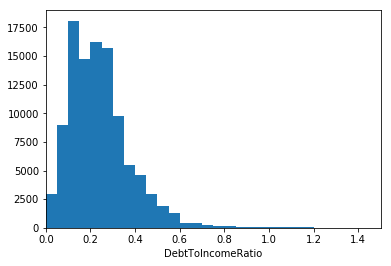

In [37]:
# Univariate plot of DebtToIncomeRatio
bins=np.arange(0,loan['DebtToIncomeRatio'].dropna().max()+0.05,0.05)
plt.hist(x=loan['DebtToIncomeRatio'].dropna(),bins=bins);
plt.xlim(0,1.5);
plt.xlabel('DebtToIncomeRatio');

>**Observation**
Debt to income ratio is mostly between 0.1 and 0.3. Small values indicate less debt compared to income.

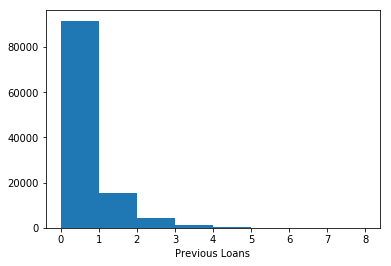

In [38]:
# Univariate plot of TotalProsperLoans
bins=np.arange(0,loan['TotalProsperLoans'].dropna().max()+1,1)
plt.hist(x=loan['TotalProsperLoans'].dropna(),bins=bins);
plt.xlabel('Previous Loans');

>**Observation**
Majority of the borrowers have previous loans with the highest number being 1 loan.

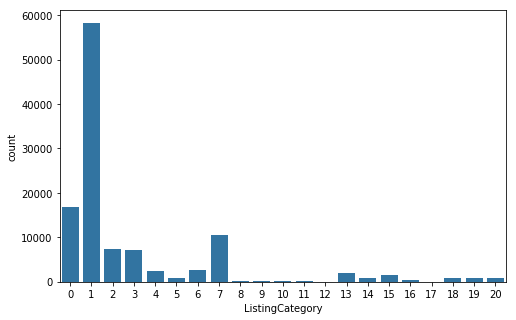

In [39]:
# Univariate plot of ListingCategory
plt.figure(figsize=(8,5))
sb.countplot(data=loan,x='ListingCategory',color=base_color);

>**Observation**
Listing category is the reason given for applying the loan Each category is given a number from 0-20. The most common reason for applying for a debt is debt consolidataion.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> LoanAmount feature had a skewed plot. To get a better understanding I looked at data using log transform. LoanAmount under tha transformation looked bimodal with highest peak at 5000 dollars. LoanAmount peaks at values that are whole values like 1000,3000,5000 etc.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were many missing values in ProsperRating column. It must have been a data entry error. These records have been removed from the dataset.

## Bivariate Exploration

> In this section we will see relationship between two features to get more in depth information.

### Disclaimer
> Since Prosper Score is only for loans after 2009. I will be considering PropserRating as a higher criteria to recognize trends upon.

In [40]:
# Divide features into numeric and categorical list
num_vars=['BorrowerAPR','Term','BorrowerRate','ProsperScore','ListingCategory','DebtToIncomeRatio','TotalProsperLoans',
        'LoanOriginalAmount','AnnualIncome','Investors']

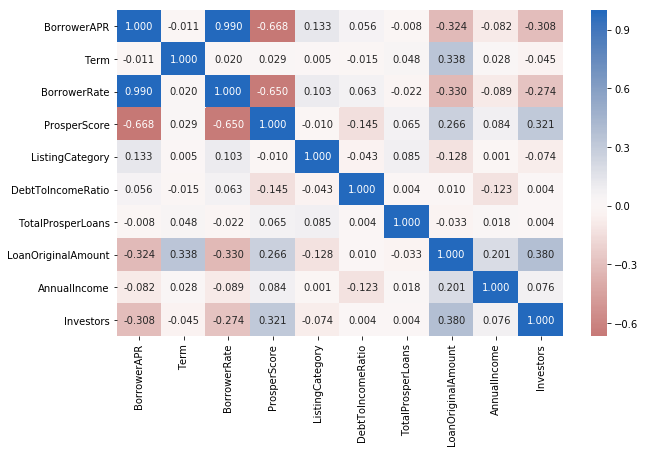

In [41]:
# Plot correlation heatmap
plt.figure(figsize = [10, 6])
sb.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

>**Observation**
>1. BorrowerAPR and BorrowerRate have a strong positive correlation.
>2. Both BorrowerAPR and BorrowerRate have a negative correlation with ProsperScore. This means that as ProsperScore increases BorrowerAPR and BorrowerRate decreases. Since ProsperScore is available only for loans listed after 2009, a better correlation exists with ProsperRating.

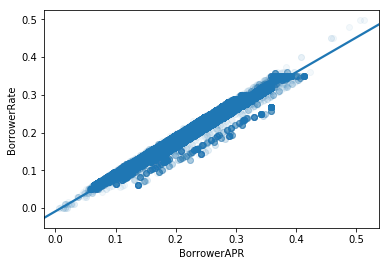

In [42]:
# Bivariate plot between BorrowerAPR and BorrowerRate
sb.regplot(data=loan,x='BorrowerAPR',y='BorrowerRate',scatter_kws={'alpha':1/20});

>**Observation**
This plot confirms our observations from the correlation heatmap that BorrowerAPR and BorrowerRate have a strong positive correlation. The plot is linear in nature.

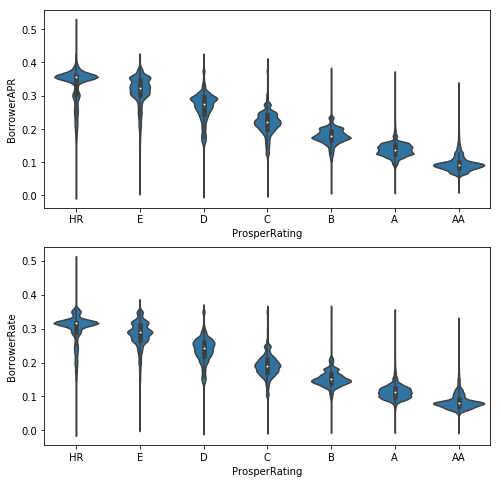

In [43]:
# Bivariate plot between BorrowerAPR, BorrowerRate and ProsperRating
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sb.violinplot(data=loan,x='ProsperRating',y='BorrowerAPR',color=base_color);
plt.subplot(2,1,2)
sb.violinplot(data=loan,x='ProsperRating',y='BorrowerRate',color=base_color);

>**Observation**
Since ProsperScore is only present for loans listed after 2009, it is better to use ProsperRating as it similar to ProsperScore but represented alphabetically. As we can see from the above plot that BorrowerAPR and BorrowerRate are strongly correlated to ProsperRating. It is a negative correaltion meaning and the values of ProsperRating increases the value of BorrowerAPR and BorrowerRate decreases.

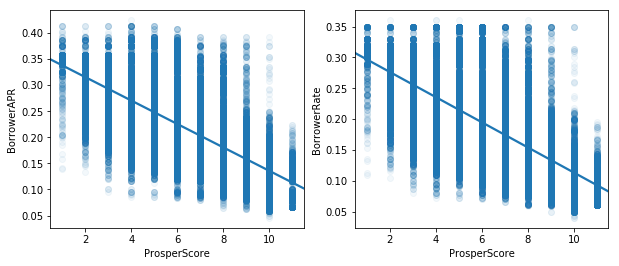

In [44]:
# Bivariate plot between BorrowerAPR, BorrowerRate and ProsperScore
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.regplot(data=loan,y='BorrowerAPR',x='ProsperScore',scatter_kws={'alpha':1/20});

plt.subplot(1,2,2)
sb.regplot(data=loan,y='BorrowerRate',x='ProsperScore',scatter_kws={'alpha':1/20});

>**Observation**
The BorrowerAPR and ProsperScore are negatively corelated. As we can observe from the above graph. Low values of ProsperScore (bad score) tend to have higher BorrowerAPR and high values (good score) tend to have low BorrowerAPR. The same trend can be observed in BorrowerRate plot

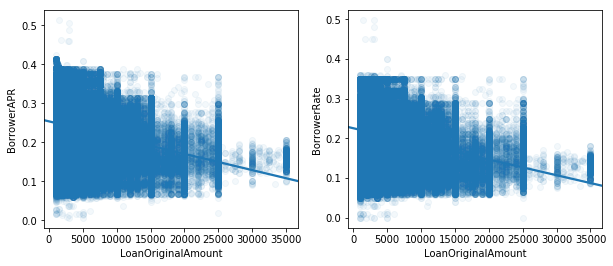

In [45]:
# Bivariate plot between BorrowerAPR, BorrowerRate and LoanOriginalAmount
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sb.regplot(data=loan,y='BorrowerAPR',x='LoanOriginalAmount',x_jitter=0.3,scatter_kws={'alpha':1/20});

plt.subplot(1,2,2)
sb.regplot(data=loan,y='BorrowerRate',x='LoanOriginalAmount',x_jitter=0.3,scatter_kws={'alpha':1/20});

>**Observation**
We can say that BorrowerAPR is weakly dependent (negative correlation) upon LoanOriginalAmount but the relationship will become more clear when it is plotted with other variables.

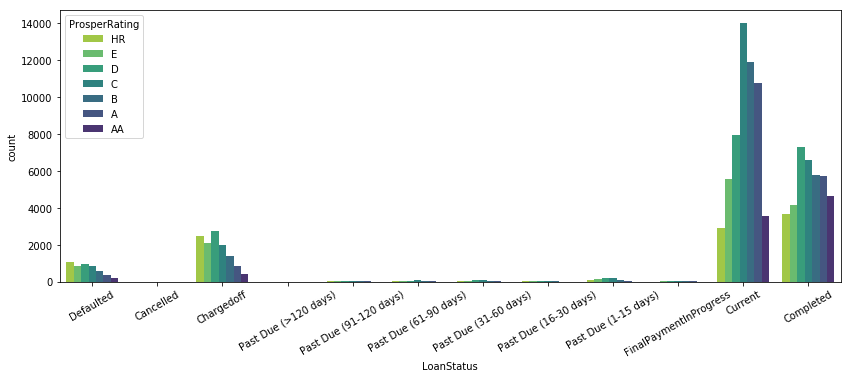

In [46]:
# Bivariate plot between LoanStatus and ProsperRating
plt.figure(figsize=(14,5))
sb.countplot(data=loan,x='LoanStatus',hue='ProsperRating',palette='viridis_r');
plt.xticks(rotation=30);
plt.legend(loc=2,title='ProsperRating');

>**Observation**
Defaulted and Chargedoff loan status have more borrower's count in the high risk-fair spectrum of ProsperRating. Loan Status like Current and Completed have more borrower's count in the good-excellent spectrum of ProsperRating

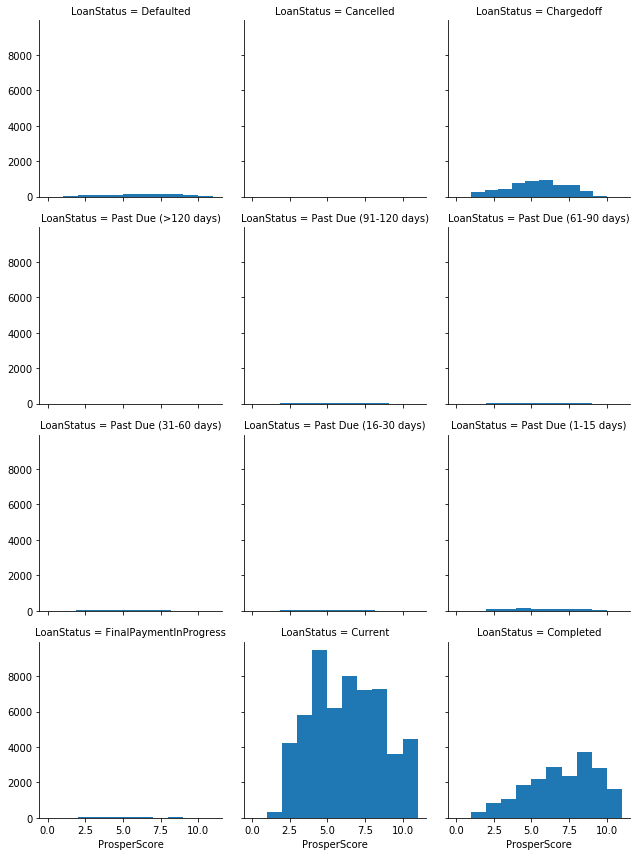

In [47]:
# Bivariate plot between LoanStatus and ProsperScore
g=sb.FacetGrid(data=loan,col='LoanStatus',col_wrap=3)
g.map(plt.hist,'ProsperScore');

>**Observation**
Borrowers with defaulted or charged off loans have an average prosper score of 2.5-7.5. Borrowers with loan status as current have a slightly higher score between 4.5-8.0. And borrowers with loan status as completed have highest propser rating between 6.0-10.

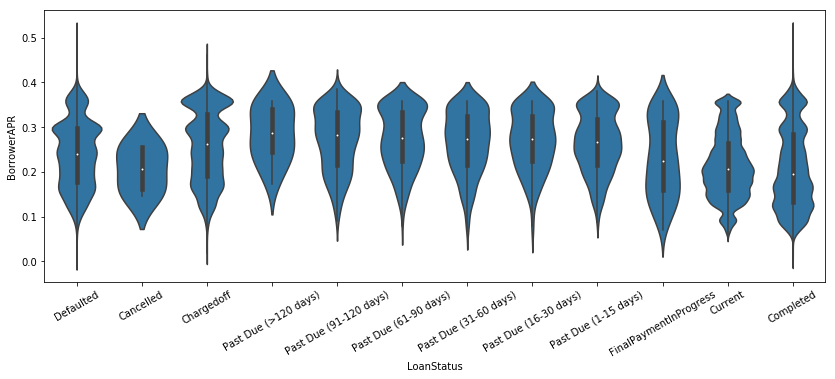

In [48]:
# Bivariate plot between LoanStatus and BorrowerAPR
plt.figure(figsize=(14,5))
sb.violinplot(data=loan,x='LoanStatus',y='BorrowerAPR',color=base_color);
plt.xticks(rotation=30);

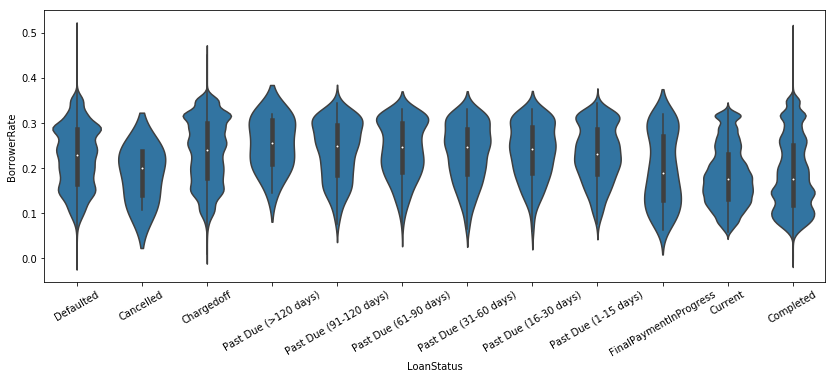

In [49]:
# Bivariate plot between LoanStatus and BorrowerRate
plt.figure(figsize=(14,5))
sb.violinplot(data=loan,x='LoanStatus',y='BorrowerRate',color=base_color);
plt.xticks(rotation=30);

>**Observation**
Defaulted, Cancelled, Charged-off and past due loans basically delinquent loans have more BorrowerAPR and BorrowerRate than Current and Completed loans. LoanStatus is dependent on BorrowerAPR and BorrowerRate.

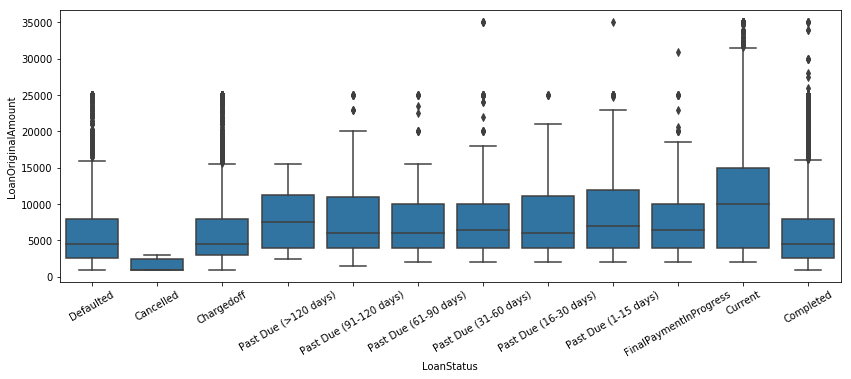

In [50]:
# Bivariate plot between LoanStatus and LoanOriginalAmount
plt.figure(figsize=(14,5))
sb.boxplot(data=loan,x='LoanStatus',y='LoanOriginalAmount',color=base_color);
plt.xticks(rotation=30);

>**Observation**
There is no clear relationship between LoanStatus and LoanOriginalAmount. To explore more we will plot other a third variable in the next section.

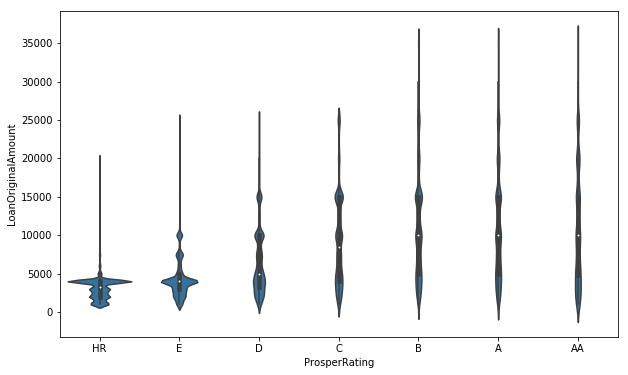

In [51]:
# Bivariate plot between LoanOriginalAmount and ProsperRating
plt.figure(figsize=(10,6))
sb.violinplot(data=loan,x='ProsperRating',y='LoanOriginalAmount',color=base_color);

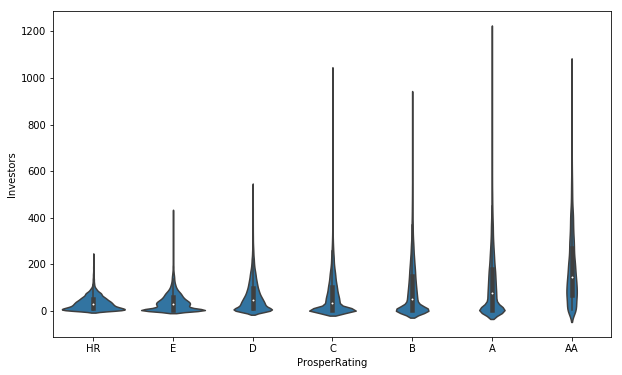

In [52]:
# Bivariate plot between ProsperRating and Investors
plt.figure(figsize=(10,6))
sb.violinplot(data=loan,x='ProsperRating',y='Investors',color=base_color);

>**Observation**
It is clear from the above two plots that borrowers with high ProsperRating are eligible for high loan amounts. If a borrower has a good Credit Grade then more number of investors will be interested in sponsoring a loan.

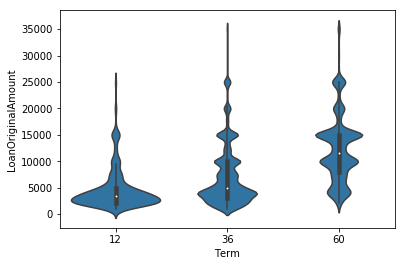

In [53]:
# Bivariate plot between LoanOriginalAmount and Term
sb.violinplot(data=loan,y='LoanOriginalAmount',x='Term',color=base_color);

>**Observation**
If Term is longer then the LoanAmount can be higher.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerAPR and BorrowerRate have a high amount of negative correlation with ProsperRating. Also a linear realtionship exists between BorrowerAPR and BorrowerRate. LoanStatus is weakly correlated with ProsperRating. It wil be interesting to see how ProsperRating affects BorrowerAPR and BorrowerRate in each category of LoanStatus.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> LoanAmount has no correlation with LoanStatus but it has correlation with ProsperRating. It is clear that ProsperRating plays an important role. It will be interesting to see hoe LoanAmount and LoanStatus interact under the influence of ProsperRating.

## Multivariate Exploration

> Lets see how ProsperRating affects the interaction between BorrowerAPR, LoanStatus and LoanAmount.

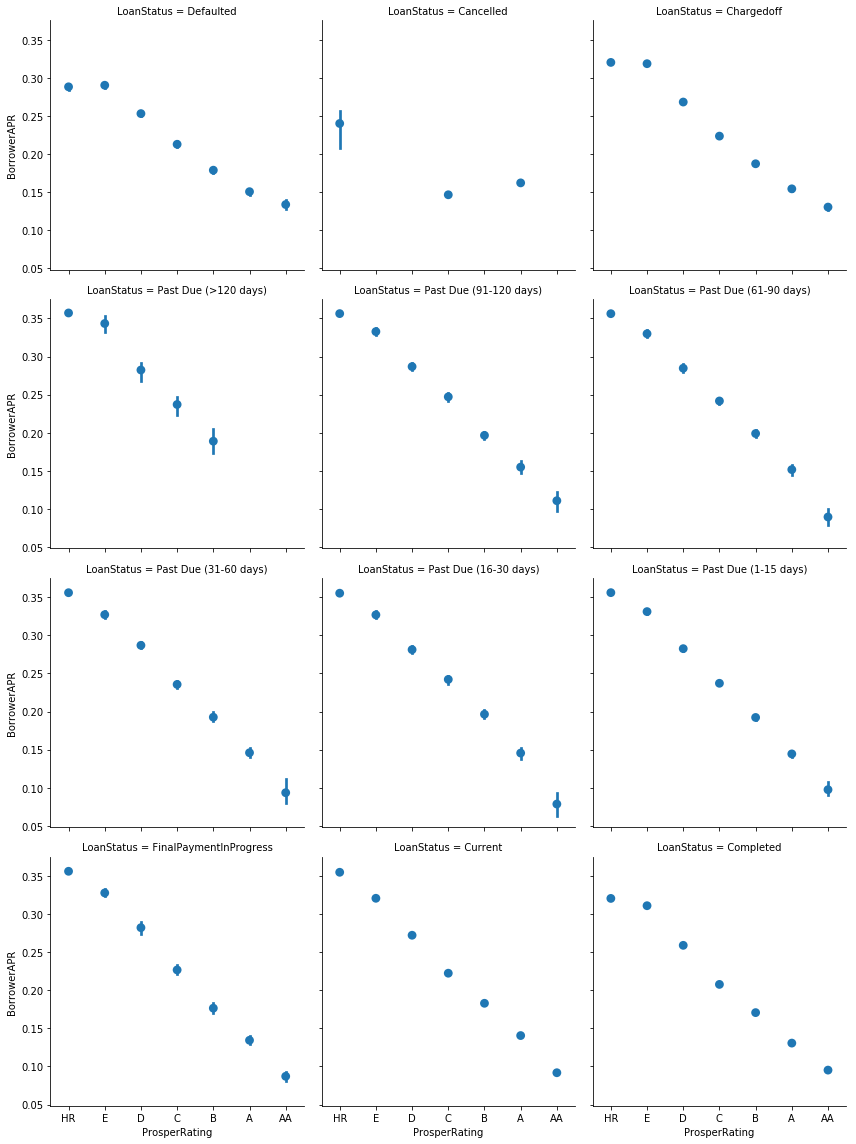

In [54]:
# Pointplot of LoanStatus, ProsperRating and BorrowerAPR
g=sb.FacetGrid(data=loan,col='LoanStatus',col_wrap=3,size=4)
g.map(sb.pointplot,'ProsperRating','BorrowerAPR',order=None,linestyles="");

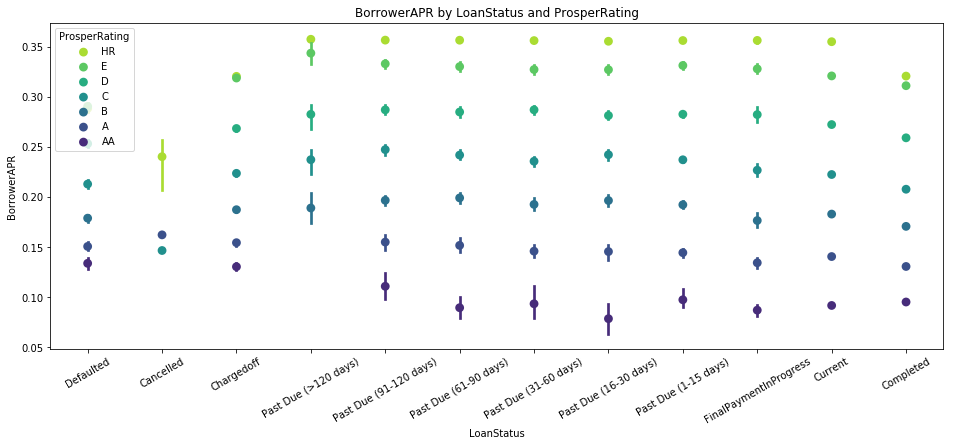

In [55]:
# Pointplot of BorrowerAPR and LoanStatus using ProsperRating as hue
plt.figure(figsize=(16,6))
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'ProsperRating', 
                  linestyles = "",palette='viridis_r');
plt.xticks(rotation=30);
plt.legend(loc=2,title='ProsperRating');
plt.title('BorrowerAPR by LoanStatus and ProsperRating');

>**Observation**
It is very clear from the above graph that PropserRating has a large influence on BorrowerAPR. It is clear that no matter what the loan status BorrowerAPR will be high for the lower end of ProsperRating scale and will be low for higher end of ProsperRating scale. This trend also holds true for BorrowerRate. The error bars indicate fewer numbers of that particular ProsperRating. Since LoanStatus-Cancelled has very few enteries hence its plot is almost empty. Also in deliquent(past due) status of loans there is less number of the above average ProsperRating compared to the numbers of below average ProsperRating.

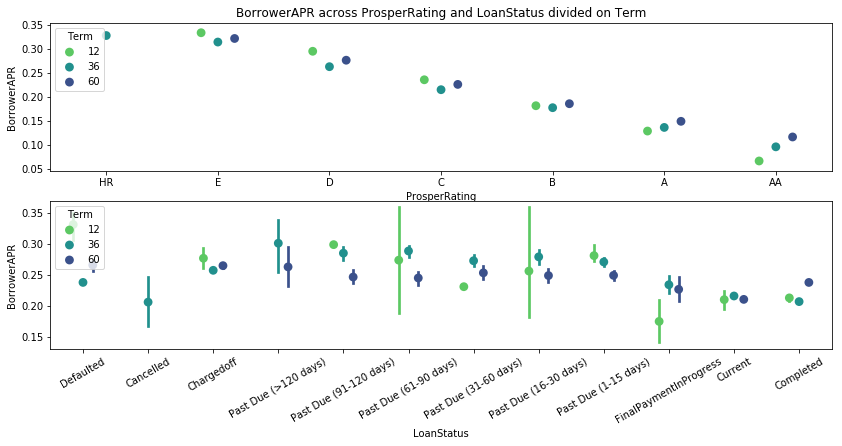

In [56]:
# Pointplot of BorrowerAPR with ProsperRating and LoanStatus using Term as hue
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
ax = sb.pointplot(data = loan, x = 'ProsperRating', y = 'BorrowerAPR', hue = 'Term',dodge=0.3, linestyles = ""
                  ,palette='viridis_r');
plt.legend(loc=2,title='Term');
plt.title('BorrowerAPR across ProsperRating and LoanStatus divided on Term');
plt.subplot(2,1,2)
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'Term',dodge=0.3, linestyles = ""
                 ,palette='viridis_r');
plt.legend(loc=2,title='Term');
plt.xticks(rotation=30);

>**Observation**
BorrowerAPR is more when the length of the Term is shortest and then dcreases as the Term increases. Error bars indicate that Term of 12 months is less in number than the others. This confirms that BorrowerAPR is strongly correlated to ProsperRating.

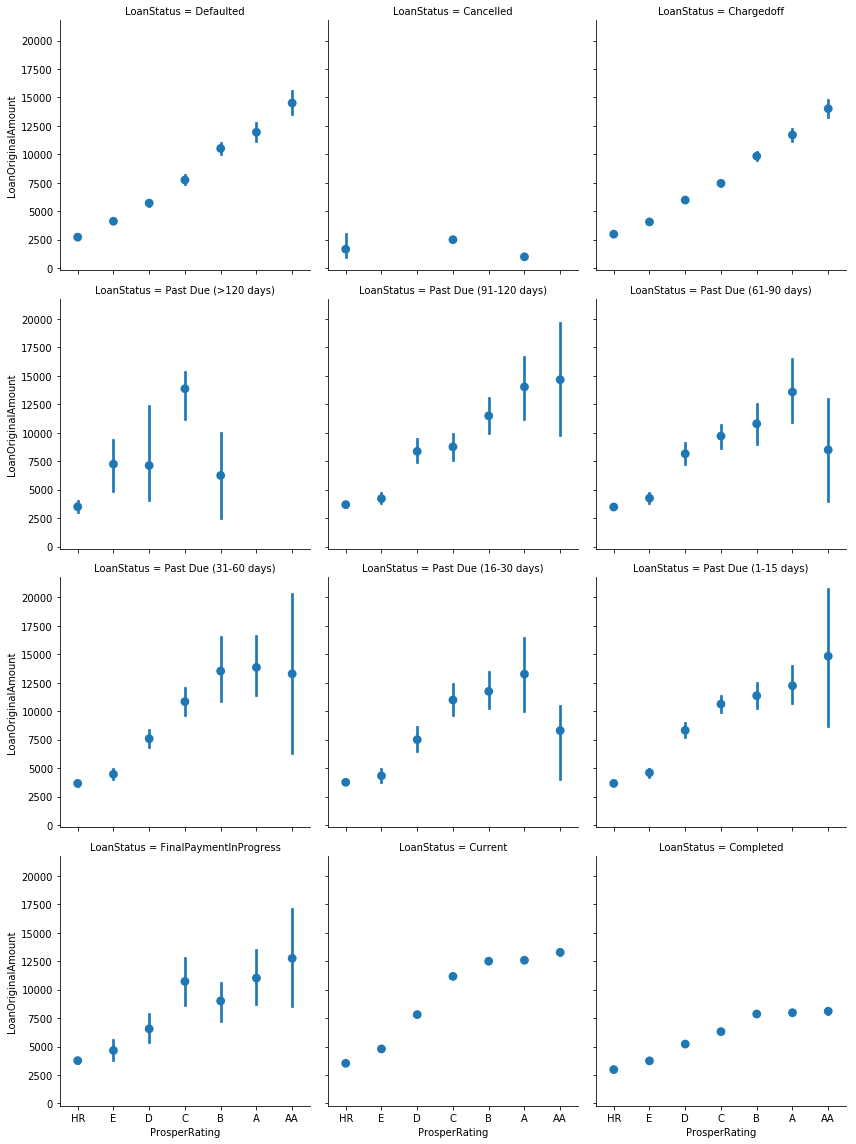

In [57]:
# Pointplot of LoanStatus, ProsperRating and LoanOriginalAmount
g=sb.FacetGrid(data=loan,col='LoanStatus',col_wrap=3,size=4)
g.map(sb.pointplot,'ProsperRating','LoanOriginalAmount',order=None,linestyles="");

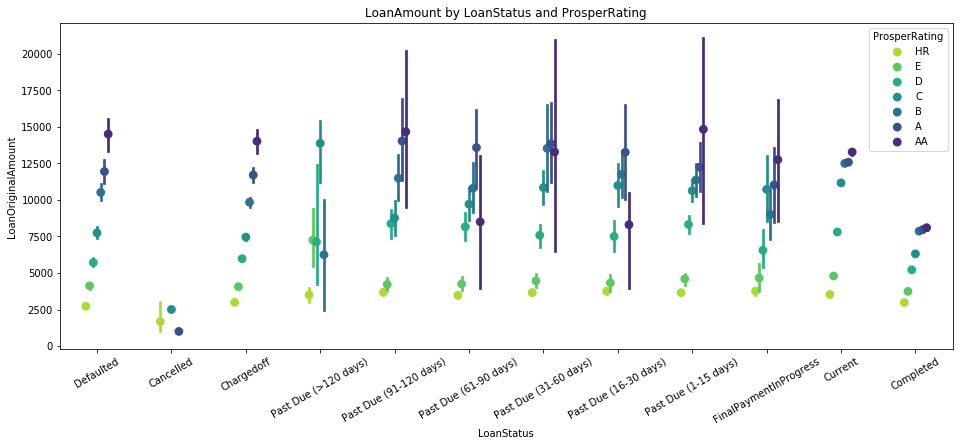

In [58]:
# Pointplot of LoanOriginalAmount and LoanStatus using ProsperRating as hue
plt.figure(figsize=(16,6))
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'ProsperRating',dodge = 0.3, 
                  linestyles = "",palette='viridis_r');
plt.xticks(rotation=30);
plt.legend(loc=1,title='ProsperRating');
plt.title('LoanAmount by LoanStatus and ProsperRating');

>**Observation**
ProsperRating also has an influence on the LoanAmount. Borrowers with higher PropserRating get more number of investors and hence they get more investment as the LoanAmount. We can see that in deliquent (past due) category of loans there are less number (error bars) of borrowers with good ProsperRating.

In [59]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

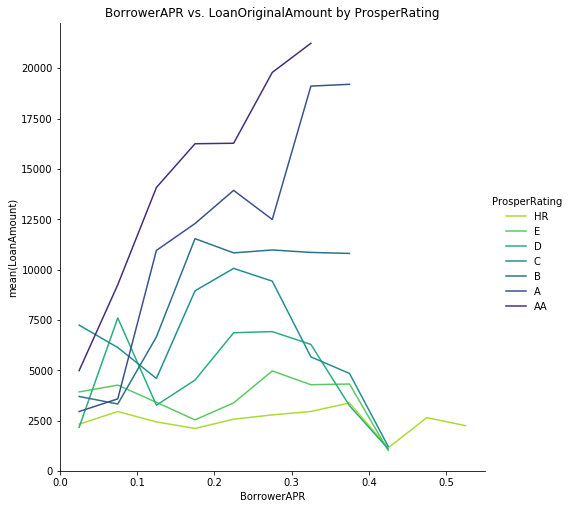

In [60]:
# Lineplot of BorrowerAPR and LoanOriginalAmount using ProsperRating as hue
bin_edges = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.05)
g = sb.FacetGrid(data = loan, hue = 'ProsperRating',size=7,palette='viridis_r');
g.map(mean_poly, "BorrowerAPR", "LoanOriginalAmount", bins = bin_edges);
g.set_ylabels('mean(LoanAmount)');
g.add_legend();
plt.title('BorrowerAPR vs. LoanOriginalAmount by ProsperRating');

>**Observation**
It becomes more clear with the line plot above as to how much ProsperRating affects features of a loan. There are two loans of different amount-2500 and 15000 dollars respectively. The mind blowing thing is that these two have the same BorrowerAPR. The main reason for this is difference in ProsperRating. The borrower with loan amount of 2500 dollars has HR rating whereas borrower with loan amount of 15000 dollars has AA rating.

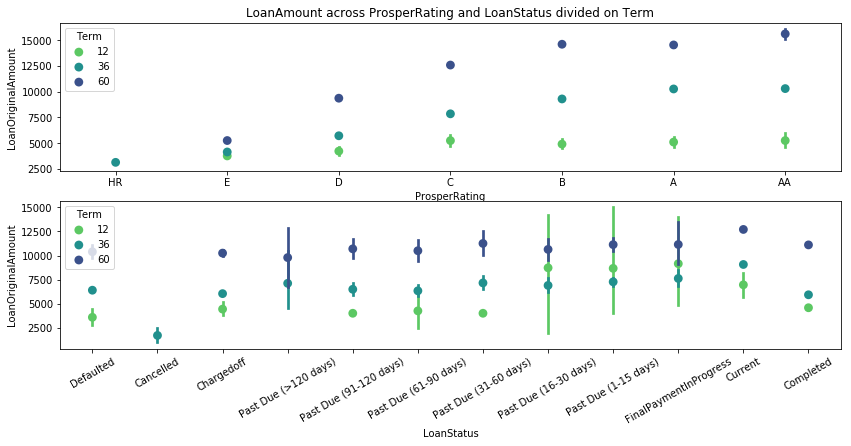

In [61]:
# Pointplot of LoanOriginalAmount with ProsperRating and LoanStatus using Term as hue
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
ax = sb.pointplot(data = loan, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term', linestyles = "",
                 palette='viridis_r');
plt.legend(loc=2,title='Term');
plt.title('LoanAmount across ProsperRating and LoanStatus divided on Term');
plt.subplot(2,1,2)
ax = sb.pointplot(data = loan, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term', linestyles = "",
                  palette='viridis_r');
plt.legend(loc=2,title='Term');
plt.xticks(rotation=30);

>**Observation**
LoanAmount also depends on the Term of a loan. Longer the term of the loan more the LoanAmount.

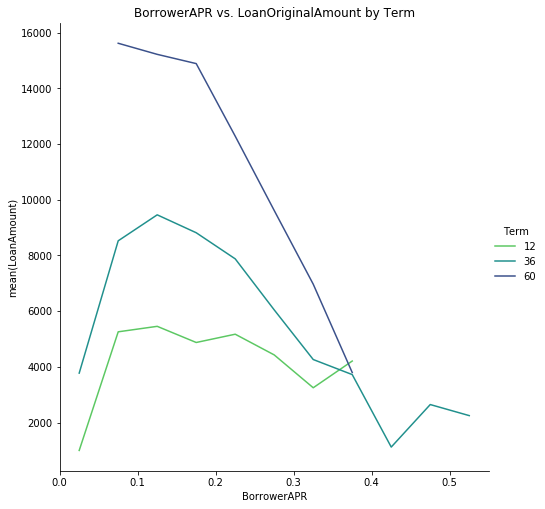

In [62]:
# Lineplot of BorrowerAPR and LoanOriginalAmount using Term as hue
bin_edges = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.05)
g = sb.FacetGrid(data = loan, hue = 'Term',size=7,palette='viridis_r');
g.map(mean_poly, "BorrowerAPR", "LoanOriginalAmount", bins = bin_edges);
g.set_ylabels('mean(LoanAmount)');
g.add_legend();
plt.title('BorrowerAPR vs. LoanOriginalAmount by Term');

>**Observation**
As we have already seen BorrowerAPR and LoanAmount also depend on Term. LoanAmount has a directly proportional realtionship with Term - more the length of Term more the LoanAmount. BorrowerAPR has an inversely porportional relationship with Term - more the length of the Term less the BorrowerAPR.

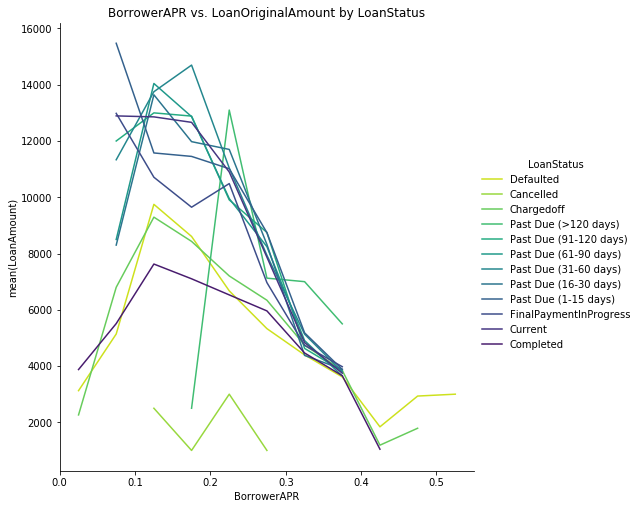

In [63]:
# Lineplot of BorrowerAPR and LoanOriginalAmount using LoanStatus as hue
bin_edges = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.05)
g = sb.FacetGrid(data = loan, hue = 'LoanStatus',size=7,palette='viridis_r');
g.map(mean_poly, "BorrowerAPR", "LoanOriginalAmount", bins = bin_edges);
g.set_ylabels('mean(LoanAmount)');
g.add_legend();
plt.title('BorrowerAPR vs. LoanOriginalAmount by LoanStatus');

>**Observation**
LoanStatus is affected by a combination of LoanAmount and BorrowerAPR. The delinquent (past due) loans have high LoanAmount with high BorrowerAPR. Defaulted, Cancelled and Charged-off loans have a little over average LoanAmount with varying BorrowerAPR which can be the influence of ProsperRating. Current and Completed loans have average LoanAmount with varying BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of BorrowerAPR and LoanStatus by looking at the impact various features like ProsperRating, LoanAmount and Term had on them.
>1. PropserRating is a very important criteria when it comes to deciding the BorrowerAPR and LoanAmount. Higher the ProsperRating higher the LoanAmount (more investors) and lower the BorrowerAPR (and BorrowerRate).
>2. Term also affects BorrowerAPR and LoanAmount. Longer the length of the Term higher the LoanAmount and lower the BorrowerAPR.
>3. LoanStatus is not dependent on one or two features. LoanStatus is affected by the combination of features like ProsperRating, BorrowerAPR, BorrowerRate, LoanAmount and Term. All these features affect the outcome of a loan. Loans with low LoanAmount cane be waived off by lenders. Loans withs good PrsoperRating are less in numbers in deliquent(past due) status. Loans with short terms are more likely to become deliquent(past due) in status and so on.
### Were there any interesting or surprising interactions between features?

> It is interesting to note that different loan amounts can have same BorrowerAPR and BorrowerRate.ProsperRating is a very important criteria.